In [38]:
import pandas as pd
import psycopg2 as p
import requests
import json
import time
import sys
import csv
import os
from config import GOOOGLE_API_KEY
# def load_data(filename):
#     with open(filename, 'r') as f:
#         lines = csv.reader(f)
#         return list(lines)


key = GOOGLE_API_KEY # DON'T SHARE WITH ANYONE

base_url = 'https://maps.googleapis.com/maps/api/geocode/json'

def crunch(file_name):    
    df = pd.read_csv(file_name)
    
    df["LATITUDE"] = ""
    df["LONGITUDE"] = ""
    
    with open('red_light_geo.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
        writer.writerow([file_name])
        
        for index, row in df.iterrows(): 
            my_params= {'address': row['LOCATION_DETAILS'].lower() + ', New South Wales, Australia', 'language':'en','key' : key}
            response = requests.get(base_url, params = my_params)

            results = response.json()
            print("{} {}".format(file_name, row['LOCATION_DETAILS']))
            
            if results['results']:
                lat_val = results['results'][0]['geometry']['location']['lat']
                lng_val = results['results'][0]['geometry']['location']['lng']
            else:
                continue
                
            writer.writerow([row['LOCATION_CODE'], lat_val, lng_val])
            
            df.at[index, 'LATITUDE'] = lat_val
            df.at[index, 'LONGITUDE'] = lng_val
            

    outdir = './geo'
    if not os.path.exists(outdir):
        os.mkdir(outdir)

    fullname = os.path.join(outdir, file_name)    

    df.to_csv(fullname)


if __name__ == '__main__':
    
    speeding_file = 'speed_data.csv'
    red_light_file =  'red_light_data.csv'
    
#     crunch(speeding_file)
    crunch(red_light_file)



red_light_data.csv MCEVOY STREET WATERLOO WESTBOUND
red_light_data.csv MCEVOY STREET ALEXANDRIA EASTBOUND
red_light_data.csv MOORE-OXLEY BYPASS CAMPBELLTOWN WESTBOUND
red_light_data.csv MOORE-OXLEY BYPASS CAMPBELLTOWN EASTBOUND
red_light_data.csv CLEVELAND STREET SURRY HILLS EASTBOUND
red_light_data.csv BOURKE STREET ZETLAND WESTBOUND
red_light_data.csv VICTORIA ROAD PARRAMATTA WESTBOUND
red_light_data.csv CUMBERLAND HIGHWAY CABRAMATTA SOUTHBOUND
red_light_data.csv CUMBERLAND HIGHWAY CABRAMATTA NORTHBOUND
red_light_data.csv KELLICAR ROAD CAMPBELLTOWN EASTBOUND
red_light_data.csv KELLICAR ROAD CAMPBELLTOWN WESTBOUND
red_light_data.csv SILVERWATER ROAD AUBURN NORTHBOUND
red_light_data.csv SILVERWATER ROAD SILVERWATER SOUTHBOUND
red_light_data.csv CANTERBURY ROAD WILEY PARK EASTBOUND
red_light_data.csv CANTERBURY ROAD ROSELANDS WESTBOUND
red_light_data.csv GREAT WESTERN HIGHWAY WESTMEAD EASTBOUND
red_light_data.csv GREAT WESTERN HIGHWAY MERRYLANDS WESTBOUND
red_light_data.csv SOUTH DOWLIN

red_light_data.csv ELIZABETH STREET SYDNEY NORTHBOUND
red_light_data.csv WILLIAM STREET DARLINGHURST WESTBOUND
red_light_data.csv EPPING ROAD LANE COVE WESTBOUND
red_light_data.csv VICTORIA ROAD ERMINGTON EASTBOUND
red_light_data.csv MERRYLANDS ROAD MERRYLANDS WEST WESTBOUND
red_light_data.csv RAWSON STREET AUBURN WESTBOUND
red_light_data.csv RUTLEDGE STREET EASTWOOD WESTBOUND
red_light_data.csv OXFORD STREET DARLINGHURST WESTBOUND
red_light_data.csv CARLINGFORD ROAD EPPING WESTBOUND
red_light_data.csv HARROW ROAD BEXLEY SOUTHBOUND
red_light_data.csv FALCON STREET NEUTRAL BAY WESTBOUND
red_light_data.csv MARCH STREET RICHMOND EASTBOUND
red_light_data.csv PACIFIC HIGHWAY WAITARA EASTBOUND
red_light_data.csv ANZAC PARADE MAROUBRA SOUTHBOUND
red_light_data.csv PENNANT STREET CASTLE HILL NORTHBOUND
red_light_data.csv THIRD AVENUE BLACKTOWN EASTBOUND
red_light_data.csv OLD WINDSOR ROAD GLENWOOD NORTHBOUND
red_light_data.csv RICHMOND ROAD DEAN PARK EASTBOUND
red_light_data.csv KING GEORGES R

76.4028230184582
18.5
4.0
70.0


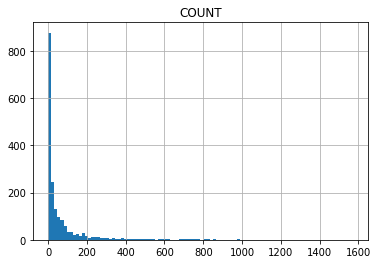

In [53]:
df = pd.read_csv('speed_data.csv')

df.hist(column = 'COUNT', bins = 100)

print(df.COUNT.mean())
print(df.COUNT.median())
print(df.COUNT.quantile(0.25))
print(df.COUNT.quantile(0.75))

131.21465968586386
125.0
94.0
176.0


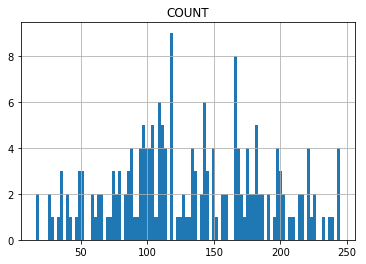

In [52]:
df = pd.read_csv('red_light_data.csv')

df.hist(column = 'COUNT', bins = 100)

print(df.COUNT.mean())
print(df.COUNT.median())
print(df.COUNT.quantile(0.25))
print(df.COUNT.quantile(0.75))